

___


# 1. Seaborn: Introducción

* Seaborn es una librería para visualización de datos estadísticos
* Está basada en matplotlib
* Permite crear visualizaciones atractivas con sus diferentes estilos
* Funciona muy bien con datos de DataFrames de Pandas 

Documentación oficial: http://seaborn.pydata.org/





## Instalación

Si aún no está instalada, puede intalar matplotlib así:

    conda install seaborn
o

    pip install seaborn
    
Funciona correctamente con la versión 0.9.0 o superior.

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)


## Importar

Por convención seaborn se importa como **sns**

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline       

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.__version__

'0.10.1'

## Datos
Seaborn posee algunos datasets incorporados los cuales podremos usar para la presentación de ejemplos, uno de ellos es **tips** el  cual almacena datos referentes a propinas dadas por clientes y algunos y datos relacionados, usaremos este dataset para algunas demostraciones.

Inicialmente cargamos el dataset **tips** en la variable tips, el dataset es 'cargado' mediante la función **load_dataset()** de seaborn

In [0]:
tips = sns.load_dataset('tips')

In [5]:
tips.info()   # visualizamos la cabecera del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# 2. Seaborn: Gráficos de distribuciones

A continuación se presentan algunos tipos de gráficos de Seaborn útiles para visualizar la distribución de datos escencialmente numéricos, estos son:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## distplot()

Distplot muestra la distribución de un conjunto de observaciones de una variable, el diagrama generado es un histograma con los valores presentes en la columna del dataset que  se define en el argumento

El ejemplo siguiente diagrama el histograma para la columna **'total_bill'** del datagrama **tips**

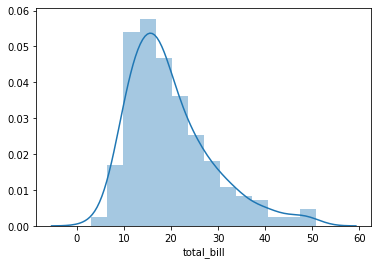

In [8]:
sns.distplot(tips['total_bill'], kde=True)       


Por defecto se presenta en la figura la linea de **Estimación de Densidad de Kernel (KDE)**, para evitar que esta sea mostrada en el diagrama,  se debe establecer el parámetro **kde** en **False** dado que por defecto su valor es **True**


**distplot()** admite varios parámetros para la personalización de la gráfica, por ejemplo con el parametro **bins** se puede establecer el número de barras (intervalos de clase) a mostrar en el histograma. Por defecto, este valor es generado con la regla **[Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)**.

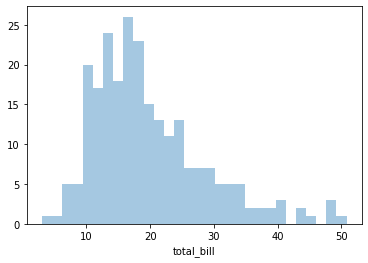

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=30)  

## jointplot()

**joinplot** permite diagramar la relación entre dos columnas númericas de un dataset. Por ejemplo, si se quisiera mostrar una relación comparativa de la propina entregada con respecto al valor total de la factura, usaríamos la función joinplot() de la siguiente manera:



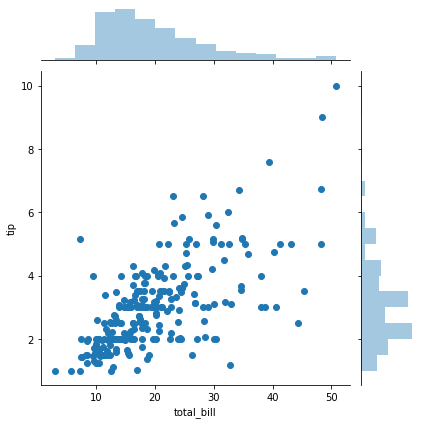

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips)   #se define la columna a diagramar en cada uno de los dos ejes, y el dataset correspondiente

In [0]:
sns.jointplot?

El resultado es una gráfica **distplot** (histograma) por cada eje, y un diagrama de tipo **scatter** que permite la interpretación de esta relación, por ejemplo en la gráfica anterior se puede interpretar que a un mayor valor del total de la factura, se tiene un mayor valor de propina, lo cual tiene sentido.

por defecto el diagrama de la relación se realiza con una visuallización tipo **scatter**, sin embargo **jointplot()**  permite hacer esta representación con otros diagramas mediante la definición del parametro **kind** el cual puede ser de los siguientes tipos:: 
* “scatter” (por defecto)
* “reg” 
* “resid” 
* “kde” 
* “hex”

Las siguientes lineas muestran el resultado de usar la función **jointplot()** con distintas formas de diagramar la relación entre las columnas:

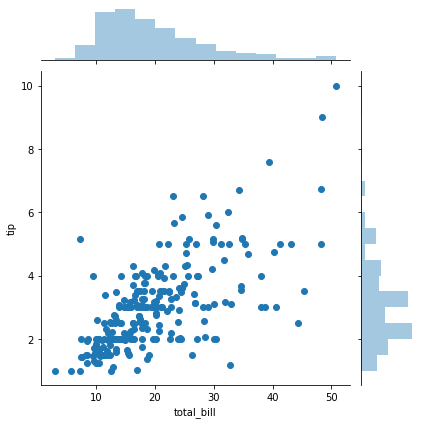

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='scatter')  #el mismo resultado anterior ya que scatter es el modo seleccionado por defecto

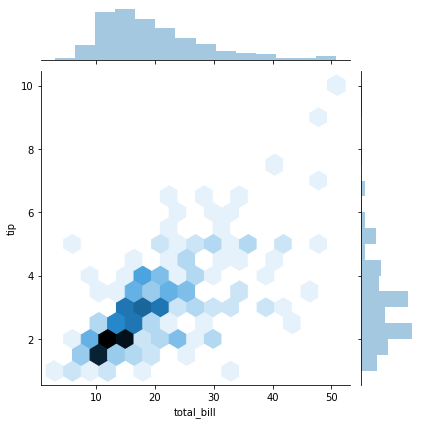

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')
# Se representa la relación con hexagonos, a mayor densidad de puntos, más oscuro se presenta el hexágono correspondiente

Podemos adicionar un objeto "colorBar" usando matplotlib:

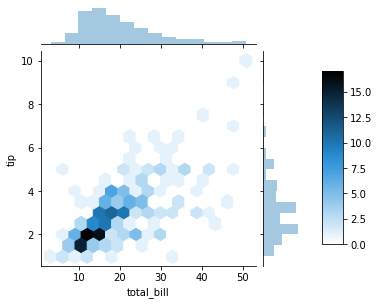

In [0]:
hexplot = sns.jointplot(x=tips["total_bill"], y=tips["tip"], kind="hex")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # reducimos el tamaño de la figura original para darle espacio al colorBar
# Constriumos un nuevo "axe" para el colorBar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, ancho, alto
plt.colorbar(cax=cbar_ax)
plt.show()

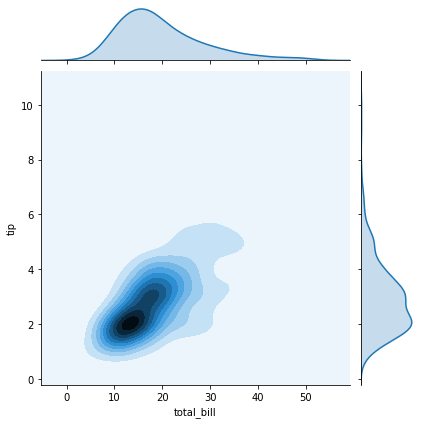

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')
#Se representa con un diagrama de densidades

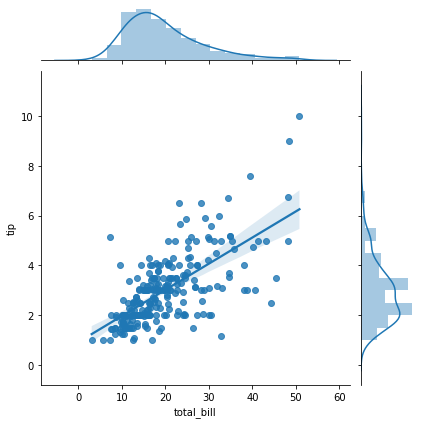

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')
# Es básicamente el diagrama de tipo scatter, pero se incluye la linea de regresión lineal

Si queremos que aparezca la ecuación de la regresión lineal:

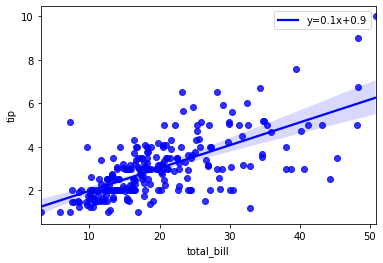

In [0]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'],tips['tip'])

# use line_kws to set line label for legend
ax = sns.regplot(x="total_bill", y="tip", data=tips, color='b', 
                 line_kws= {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
ax.legend()
plt.show()

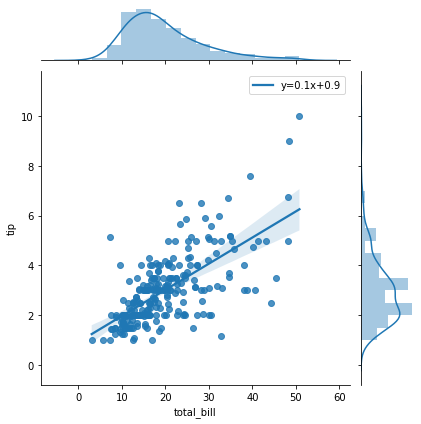

In [0]:
ax = sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
#ax.fig.axes[0].set_xlim(0,50)
#ax.fig.axes[0].set_ylim(0,10)
ax.fig.axes[0].legend()
#ax.fig.axes
plt.show()

## pairplot()

**pairplot()** grafica las distribuciones comparando relaciones de las variables númericas del dataframe, **pairplot()** genera una diagrama para cada combinación posible de dos columnas numéricas contenidas en el dataframe que recibe como parametro.


In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


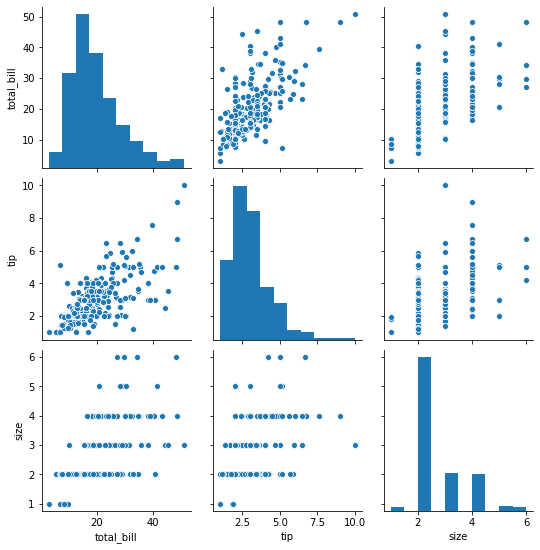

In [0]:
sns.pairplot(tips)

El resultado anterior es un diagrama por cada par de variables numéricas relacionadas. En cada eje se encuentran representadas cada una de las columnas numéricas del dataframe, y en el cruce de estas, la gráfica correspondiente a su relación en un diagrama tipo scatter. Como se muestra en el resultado, en los casos en que se cruza la variable consigo misma (diagonal), se diagrama en su lugar el histograma correspondiente a esa variable.


Adicionalmente en el llamado a **pairplot()** se puede incluir el parámetro **hue** con el que se puede especificar una categorización o clasificación de acuerdo a una columna categórica del mismo dataframe. En el ejemplo siguiente se especifica **hue='sex'**, de esta manera las gráficas resultantes clasificaran los resultados mediante colores distintos para cada valor la columna **sex** en el dataframe, en este caso **male** y **female**. 

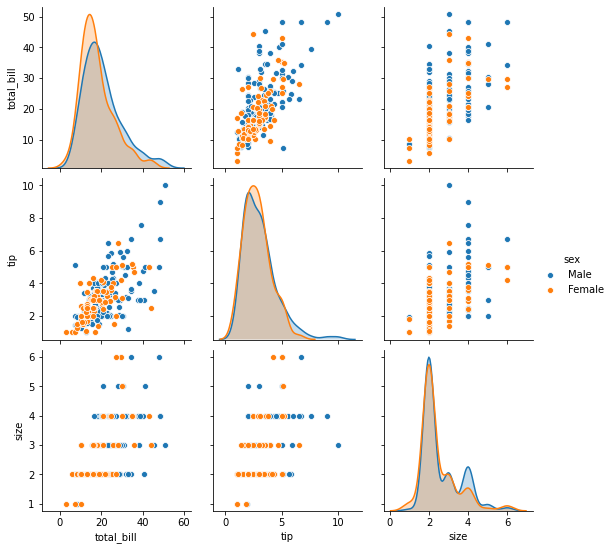

In [0]:
sns.pairplot(tips,hue='sex')
# Si queremos usar histogramas en la diagonal, usar el parámetro: diag_kind='hist'

In [0]:
sns.pairplot?

El uso del parámetro **palette** permite establecer un estilo de colores predefinido para la gráfica. En la documentación de seaborn podrá encontrar los estilos de color disponibles, algunas opciones son:
**coolwarm, deep, muted, bright, pastel, dark, colorblind**.

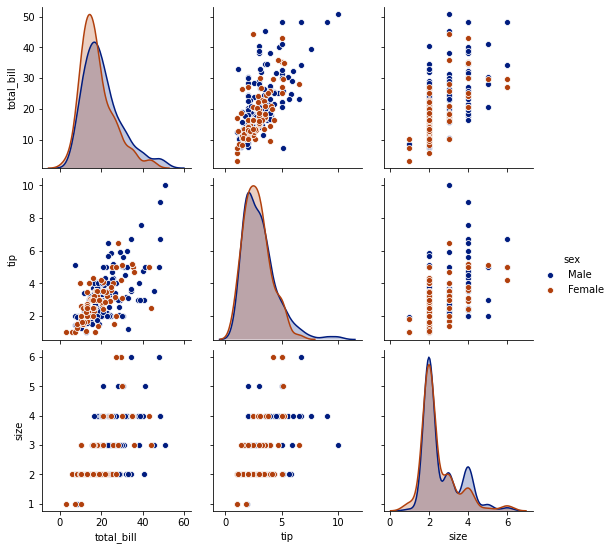

In [0]:
sns.pairplot(tips,hue='sex', palette='dark')

## rugplot()

Un rugplot permite una representación gráfica de los valores de una columna numérica en un solo eje, consiste básicamente en la gráfica de los valores de la variable a lo largo de un solo eje, representando su distribución mediante densidades. Podría interpretarse como un tipo de diagrama **scatter** de una sola dimensión, es decir, sobre un solo eje. 

In [0]:
sns.rugplot?

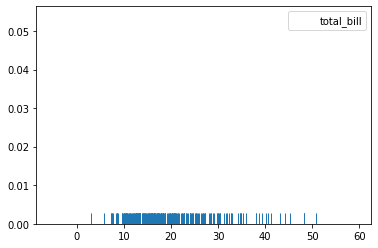

In [0]:
sns.kdeplot(tips["total_bill"], ls="")
sns.rugplot(tips['total_bill'])

**rugplot** permite la personalización de la gráfica mediante uso de distintos parametros. Por ejemplo, es posible definir el eje sobre el cual se desea diagramar , así como la elevación o altura del diagrama (parametros **axis** y **height**, respectivamente):

(0.0, 1.0)

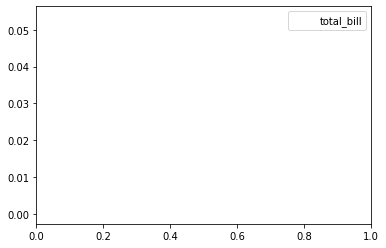

In [0]:
sns.kdeplot(tips["total_bill"], ls="")
ax =  sns.rugplot(tips['total_bill'], axis='y', height=1)
ax.set_xlim(0,1)

## kdeplot()

kdeplots son [gráficos de Estimación de Densidad del Kernel](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). Estas representaciones de KDE reemplazan cada observación con una distribución Gaussiana (Normal) centrada alrededor de ese valor.

La función **kdeplot()** gráfica básicamente un diagrama de densidades, en el cual la densidad de las observaciones sobre un eje, se representa como la altura sobre el otro eje. 


El siguiente diagrama usa **kdeplot()** para graficar la distribución de los valores de la columna **total_bill** con un diagrama de densidades **kde**

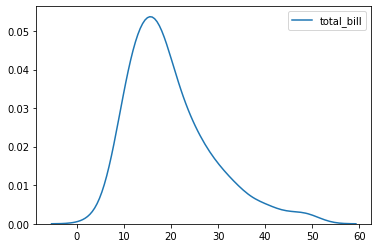

In [0]:
sns.kdeplot(tips['total_bill'])


Probablemente se interpreten o conceptualicen mejor los diagramas generados por **kdeplot()** y **rugplot()** si los dibujamos sobre una misma gráfica, en las siguientes lineas se visualizan los dos tipos de diagramas sobre una misma gráfica para las colomnas **'tip'** y **'total_bill'**

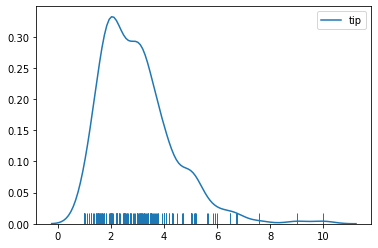

In [0]:
sns.kdeplot(tips['tip'])  # diagrama tipo kdeplot para la columna propinas
sns.rugplot(tips['tip'])  # diagrama tipo rugplot para la columna propinas

In [0]:
sns.kdeplot(tips['total_bill'])  # diagrama tipo kdeplot para la columna total factura
sns.rugplot(tips['total_bill'])  # diagrama tipo rugplot para la columna total factura

# 3. Seaborn: Datos categóricos

A continuación veremos las funciones especiales para la representar la distribución de los datos por categorias, entendiendo esto como la distribución de los datos respecto a columnas no numéricas, pero con valores que clasifican los datos por categorias; por ejemplo por sexo, nacionalidad, profesión, etc; así como su relación con respecto a otras columnas numéricas o también de categoria.

Detallaremos el uso de las siguientes funciones:

* barplot
* countplot
* boxplot
* violinplot
* stripplot
* swarmplot
* catplot


In [0]:
tips.head()

## barplot y countplot

Estas gráficas son muy similares, permiten obtener datos agregados de una variable categórica. 

### barplot

**barplot()** es un gráfico general que permite consolidar por categoría, la distribución con respecto a los valores de cierta columna numérica basados en alguna función que por defecto es la media.

Por ejemplo, para el dataframe **tips** podriamos estar interesados en conocer cual es el promedio por sexo, del valor total de factura cancelado. Para ello usamos la función **barplot()**, en donde se especifica la categoria por la cual se consolidará el resultado (x='sex'), el dato o columna que queremos consolidar (y='total_bill'), y finalmente el dataframe del cual se obtendran los datos (data=tips):

In [0]:
sns.barplot(x='sex',y='total_bill',data=tips)              #ci=None (sin la barra)
# Por defecto presenta barras con el error (intervalo de confianza) de la medida de tendencia central

Es posible cambiar la función de agregación, por una función propia u otra predefinida que convierta un vector a un escalar. Por ejemplo, la desviación estándar. Esto se realiza definiendo el parámetro **estimator** en el llamado a la función:

In [0]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)          

### countplot

Básicamente es lo mismo que barplot, excepto que el estimador está contando explícitamente el número de ocurrencias; por eso solo pasamos el valor de x que corresponde a la categoria que se diagramará, el resultado es una gráfica con el consolidado de ocurrencias por cada categoria, que en el caso del ejemplo corresponde a cada 'día'

In [0]:
sns.countplot(x='day',data=tips)

## boxplot y violinplot

Los diagramas de caja (boxplots) y los "violinplots" se utilizan para mostrar la distribución de datos por categorias

### boxplot 

Un diagrama de caja muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable para distintas categorias. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto los puntos que se determinan como valores atípicos (outliers) utilizando un método que es una función del rango intercuartílico.


En el ejemplo siguiente se muestra la distribución correspondiente para la columna **total_bill** clasificándola por día de la semana, cada caja representa la distribución correspondiente para cada día

Text(0, 0.5, 'Total cuenta')

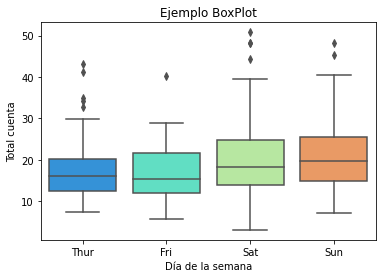

In [0]:
ax = sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')
ax.set_title("Ejemplo BoxPlot")
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Total cuenta")


Es posible hacer una ramificación dentro de una categoria, para mostrar dentro de ella la distribución correspondiente a subcategorias originadas de agrupar los datos de acuerdo a  los valores contenidos en otra columna no cuantitativa.

Por ejemplo podriamos querer visualizar la distribución de los valores de la columna **total_bill** para cada día, pero mostrando separadamente la distribución que corresponde a grupos según su **sexo**, para ello se hace uso del parámetro **hue** con el que se especifica la subcategoria: 

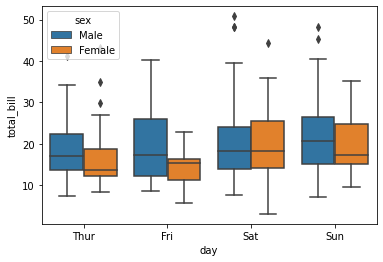

In [0]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

Si en el llamado a la función no se especifical los parametros **x** y **y**, el resultado es que se mostrará la distribución general (es decir no por categorias), de cada una de las columnas de valor cuantitativo contenidas en el dataframe enviado como parámetro:

In [0]:
sns.boxplot(data=tips)

Es posible personalizar la gráfica con el uso de algunos otros parámetros como **palette**, o **orient**. En el siguiente ejemplo usamos el parametro **orient** para cambiar la orientación de las gráficas a un modo horizontal:

In [0]:
sns.boxplot(data=tips, orient='h')

### violinplot
Un gráfico de violín juega un papel similar al diagrama de cajas. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones se puedan comparar. A diferencia de un diagrama de caja, en el que todos los componentes de la gráfica corresponden a puntos de datos reales, la gráfica del violín presenta una **estimación de la densidad de kernel** de la distribución subyacente **(kde)**.

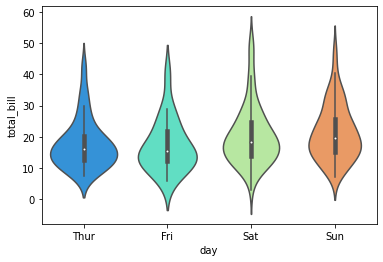

In [0]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')

**violinplot** igualmente permite el uso del parametro **hue** para diagramar una subcategorización de acuerdo a valores de otra columna no numérica:

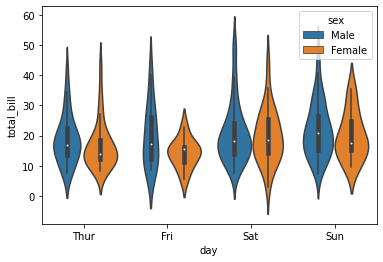

In [0]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex')

**violinplot** permite mostrar la distribución de cada subcategoria de manera subyacente, es decir, no mostrando una figura independiente sino 'partiendo' la figura en dos para diagramar cada subcategoria en una mitad de la figura, para ello se usa el parámetro **split** asignandole el valor **True**, esto se comprende mejor mediante la visualización de un ejemplo:

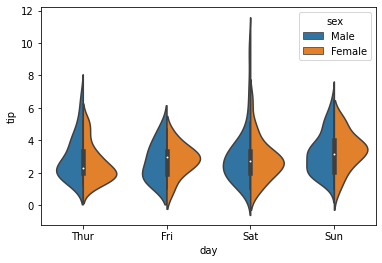

In [0]:
sns.violinplot(x="day", y="tip", data=tips,hue='sex', split=True)

## stripplot y swarmplot



### stripplot
El stripplot dibuja un diagrama de dispersión correspondiente a una variable numérica, clasificándola de acuerdo a una variable categórica.

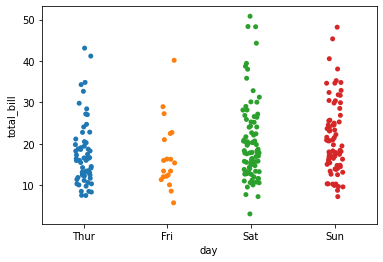

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips)

Si quisiéramos ver la distribución en una sola línea de puntos, es posible usar el parámetro **jitter** con el valor **False**:

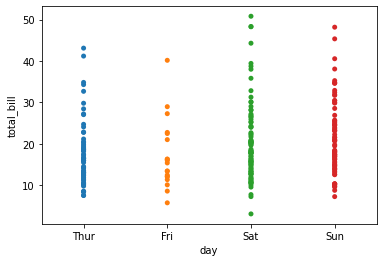

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)

También es posible usar el parametro **hue** para realizar una subclasificación de acuerdo a valores de otra columna no cuantitativa:

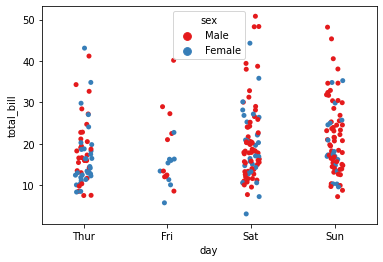

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

el parámetro **dodge** (split) también funciona con esta función y permite una visualización aún mejor:

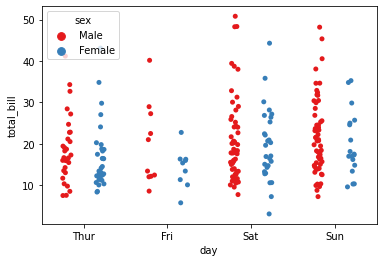

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1', dodge=True) 

### swarmplot

**swarmplot()** es similar a **stripplot()**, pero los puntos se ajustan (solo a lo largo del eje categórico) para que no se superpongan. Esto proporciona una mejor representación de la distribución de los valores, aunque no se ajusta a un gran número de observaciones (tanto en términos de la capacidad de mostrar todos los puntos como en términos del cálculo necesario para organizarlos), por lo que no es recomendable su uso cuando se tiene una gran cantidad de observaciones.

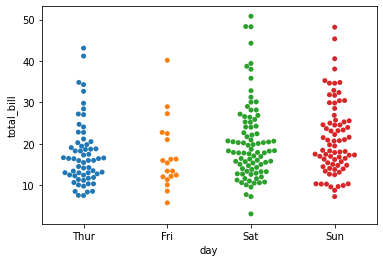

In [0]:
sns.swarmplot(x="day", y="total_bill", data=tips)

Como se ve en la gráfica anterior, **swarmplot** es una especie de combinación entre **splitplot** y **violinplot**

Finalmente se ilustra como **swarmplot** también admite los parámetros **hue** y **dodge** para subclasificar de acuerdo a otra variable:

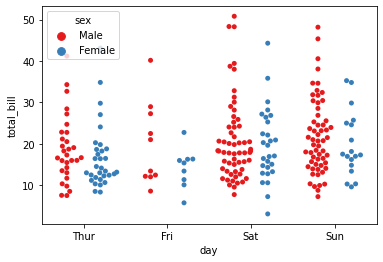

In [0]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

## Combinaciones de gráficos para variables categóricas

Es posible sobreponer dos tipos de diagramas diferentes sobre una misma gráfica para tener mayor información y mejorar la interpretación de los datos. Esto se logra llamando seguidamente dos funciones de visuallización con la misma definición de valores a diagramar como se ilustra en el siguiente ejemplo en donde se sobreponen un **swarmplot** y un **violinplot** :

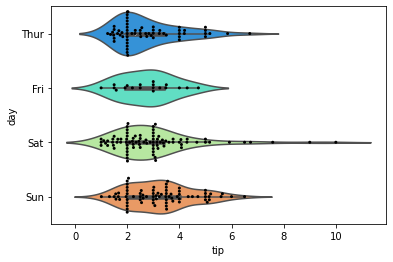

In [0]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## catplot

**catplot** (antes factorplot) es un método genérico con el que se puede graficar cualquiera de los estilos previamente vistos. Los parámetros usados son básicamente los mismos, pero adicionalmente se define el parámetro **kind** para especificar el estilo de diagrama que se desea, este puede tomar los valores: **bar**, **swarm**, **violin**, etc.

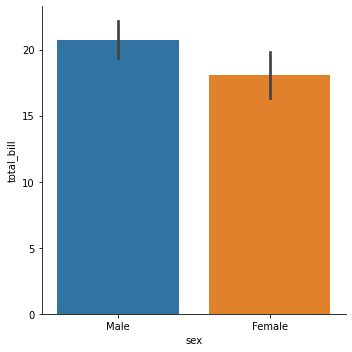

In [0]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')

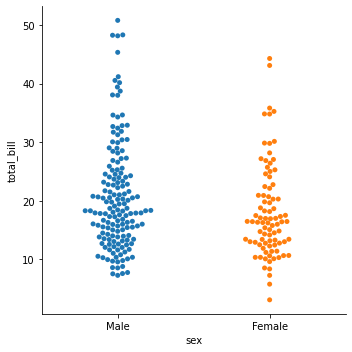

In [0]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='swarm')

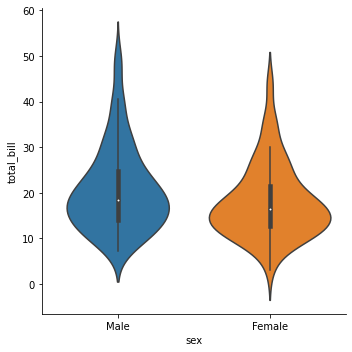

In [0]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='violin')

In [0]:
sns.catplot?

# 4. Seaborn: Gráficos matriciales

Los diagramas de matriz le permiten graficar los datos como matrices codificadas por colores y también se pueden usar para indicar grupos (clusters) dentro de los datos.

Comencemos explorando el heatmap y el clustermap de seaborn:

## Heatmap

Para que un mapa de calor funcione correctamente, sus datos ya deberían estar en forma de matriz. La función de sns.heatmap básicamente los colorea por usted. Por ejemplo:


In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


La función **corr()** retorna una matriz con los valores de correlación entre pares de columnas, de esta manera los indices horizontales y verticales del dataframe retornado son los nombres de las columnas con valores numéricos de la matriz original, los valores de la matriz retornada son los indices de correlación entre los correspondientes pares de indices que se intersecan:


In [0]:
tips.corr()  #Retorna la matrix de correlaciones para pares de columnas con valor numérico 
# Por defecto: Pearson

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


La función **corr()** no funciona **inplace** por lo que la matriz original no es modificada, ahora usamos la función **heatmap()** para generar el mapa de calor de la matriz de correlación retornada por **corr()**

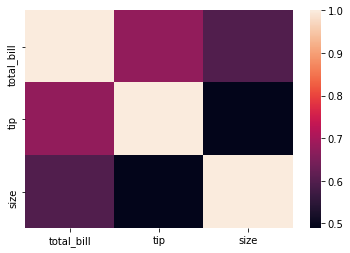

In [0]:
sns.heatmap(tips.corr())

Para este caso el diagrama permite identificar mediante tonos de colores los índices de correlación, a mayor tono, mayor es el indice de correlación, como es de suponer la diagonal representa la intersección de una columna consigo misma por lo que su valor de correlación es uno y al ser el mas alto es el que se representa con el tono mas fuerte, es posible incluir en la matriz el valor correspondiente ajustando el parametro **annot** en **True**

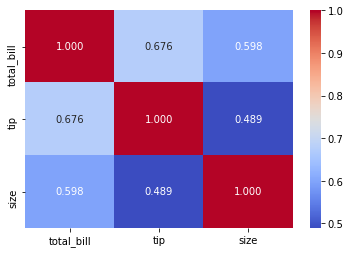

In [0]:
sns.heatmap(tips.corr(), annot=True, fmt='.3f', cmap='coolwarm')

Se pueden usar distintas opciones para personalizar el estilo de la gráfica, por ejemplo es posible poner líneas de separación definiendo su color y grosor:

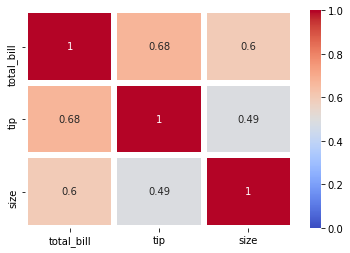

In [0]:
sns.heatmap(tips.corr(),annot=True, linewidths=5, linecolor='white', cmap='coolwarm', vmin=0)

### Datos: vuelos

Para los ejemplos siguientes usaremos un dataset incorporado en Seabornque corresponde a información de vuelos. Se registra la fecha y cantidad de pasajeros en vuelos (en US).

In [0]:
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [0]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


**Para ver un heatmap con estos datos de vuelos (flights) necesitamos contruir la matriz primero:**

Para armar la matriz, se puede usar la función **pivot_table()**, así definimos los valores que se quieren relacionar. En este ejemplo se define que en las columnas se referirán los años y en los índices horizontales los meses; los valores de la matriz serán la cantidad de pasageros para cada par **mes-año** respectivamente: 

In [0]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year',aggfunc='sum')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


Ahora se usa un diagrama de calor de la matriz resultado. Se puede concluir que julio es el mes en que hay mayor tendencia a viajar, igualmente muestra un aumento progresivo de pasajeros cada año mostrando que el de mayor cantidad de pasajeros es el año 1960, estas conclusiones se pueden sacar con solo ver la gráfica y evaluando las tonalidades del diagrama, lo que fácilita el análisis de la información.

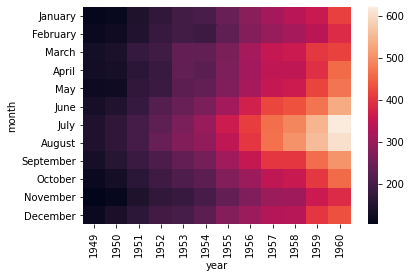

In [0]:
sns.heatmap(pvflights)

Podemos igualmente personalizar la gráfica con lineas divisorias y usando diferentes tonalidades de colores con el parametro **cmap** como se ve en la gráfica siguiente:

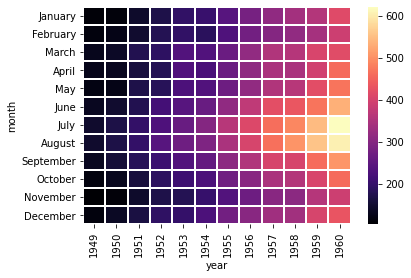

In [0]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## Clustermap

El clustermap usa agrupamiento jerárquico (dendogramas) para generar una versión del mapa de calor donde se puedan apreciar los grupos. Por ejemplo:

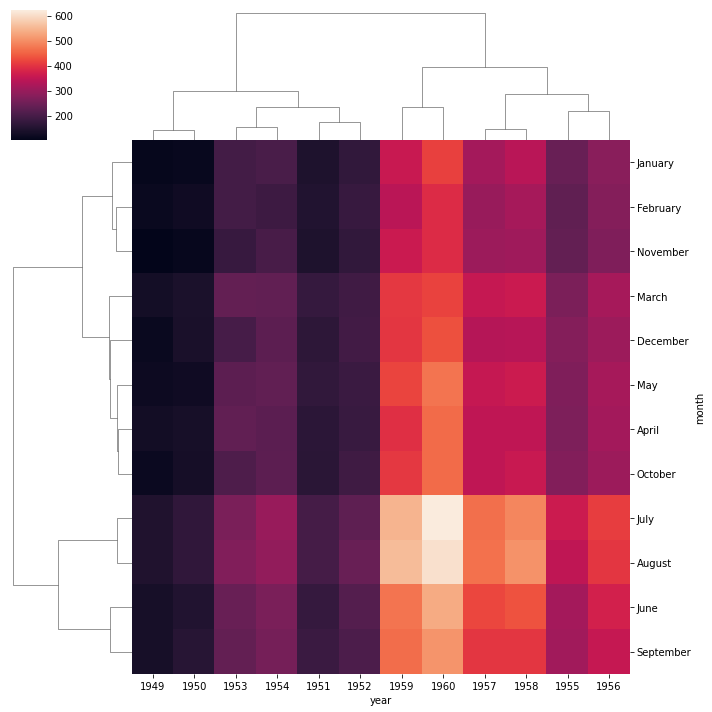

In [0]:
sns.clustermap(pvflights)

Observe cómo los años y meses ya no están en orden, en su lugar se agrupan por similitud en el valor (recuento de pasajeros). Eso significa que podemos comenzar a inferir cosas de esta trama, como por ejemplo que agosto y julio siendo similares, se encuentran agrupados (tiene sentido, ya que ambos son meses de viaje de verano).

Se pueden añadir más opciones para entender mejor los datos, por ejemplo mediante para la normalización de los datos se puede usar el parámetro **standard_scale** asignándole el valor 1:

In [0]:
vuelos = sns.clustermap(pvflights, cmap='coolwarm', standard_scale=1)

El resultado de la diagramación se puede asignar a una variable, como en el caso anterior en donde se asignó a la variable vuelos, podemos exportar a un archivo el diagrama mediante la función savefig()

In [0]:
vuelos.savefig("vuelos.pdf")

# 5. Seaborn: Grids

Las cuadrículas (grids) son tipos generales de gráficos que le permiten mapear diagramas en filas y columnas de una cuadrícula, esto significa que se dibujaran distintas gráficas para cada par de datos correspondientes dentro de la cuadricula, dentro de esta clase cabe la función **pairplot()** que se vio anteriormente con la que se grafican los datos para cada par de columnas de valor numérico, la función **pairplot()** se explicó lineas arriba en donde se ejemplificaron algunos casos.


Para los ejemplos siguientes obtendremos un dataframe de los datos incorporados en el módulo seaborn, en este caso obtenemos el dataframe **irirs** que contiene diferentes medidas  correspondientes a ciertas especies de flores:

In [0]:
iris = sns.load_dataset('iris')

In [0]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## pairplot

**Podemos visualizar rápido el dataset mediante la función pairplot que vimos antes:**

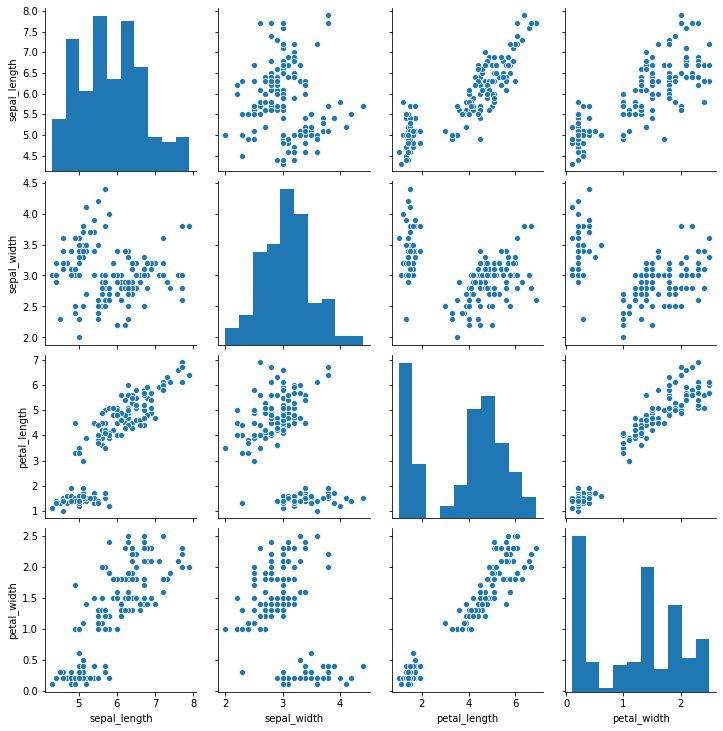

In [0]:
sns.pairplot(data=iris)

In [0]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

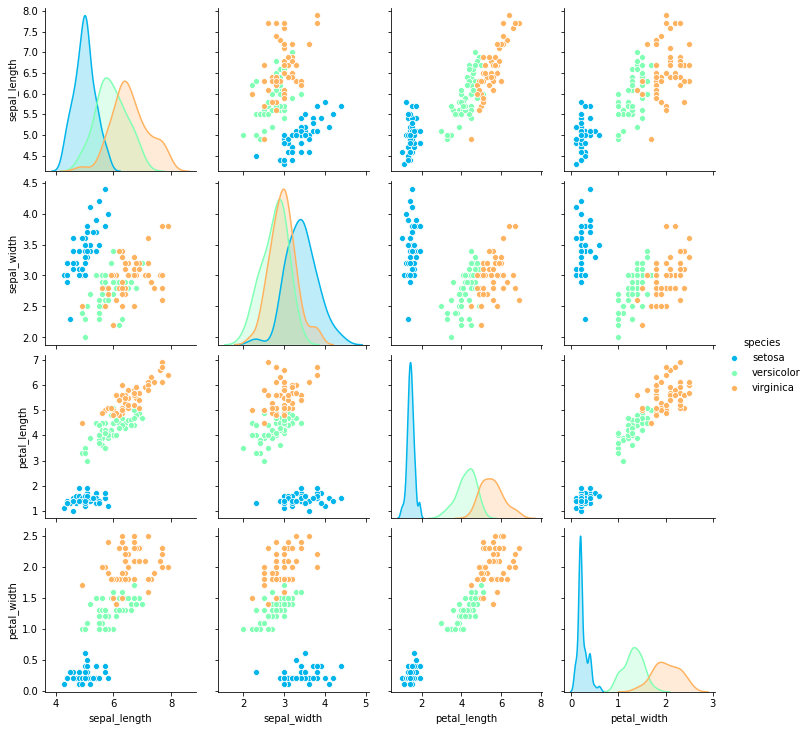

In [0]:
sns.pairplot(iris,hue='species',palette='rainbow')

**Los mecanismos que veremos en este Notebook permiten personalizar este tipo de visualización. Estos métodos son: PairGrid y FacetGrid**

Se trabajará con las funciones **PairGrid()** y **FacetGrid()** para clarificar su uso:

## PairGrid

**PairGrid()** genera una cuadrícula de subplots para presentar gráficos por cada pareja de variables del dataset, inicialmente las gráficas generadas no contienen ningún tipo de diagrama, simplemente están en blanco disponibles para dibujar sobre ellas el tipo de diagrama que se desee, esto permite un amplio control y personalización sobre estas gráficas.

Usamos **PairGrid()** enviandole como parámetro el dataset que se desea diagramar, en este caso **iris**, esto genera la siguiente cuadricula en donde en cada eje se encuentran representadas las columnas númericas del dataframe, y las gráficas en blanco por cada pareja.

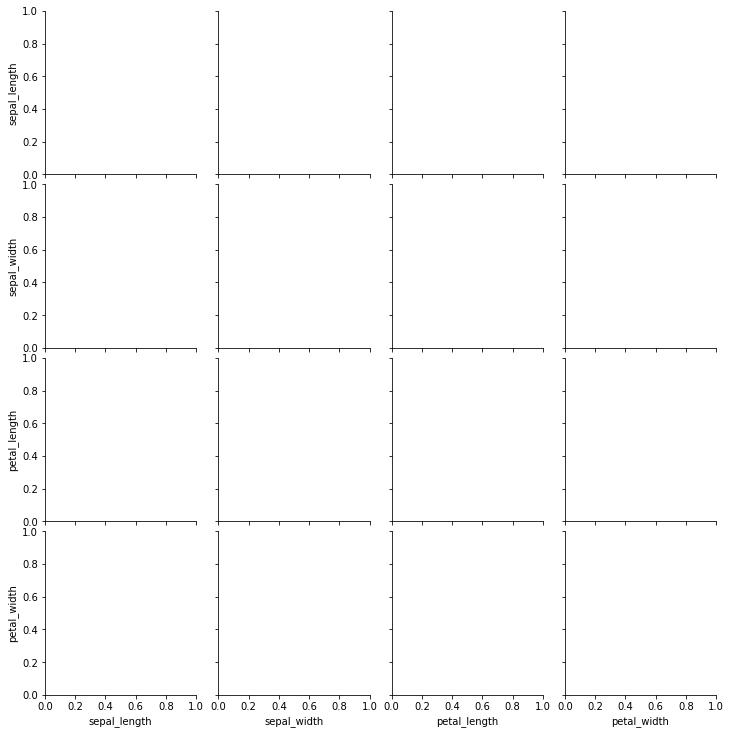

In [0]:
# Solo la cuadrícula
sns.PairGrid(iris)

Para manipular la cuadricula,  la asignamos a una variable **g** mediante la cual se podran manipular las gráficas de la cuadricula, ahora podremos usar **g** como la referencia a la cuadricula para mapear las gráficas, en el siguiente ejemplo, se mapean las gráficas con diagramas de tipo **scatter**: 

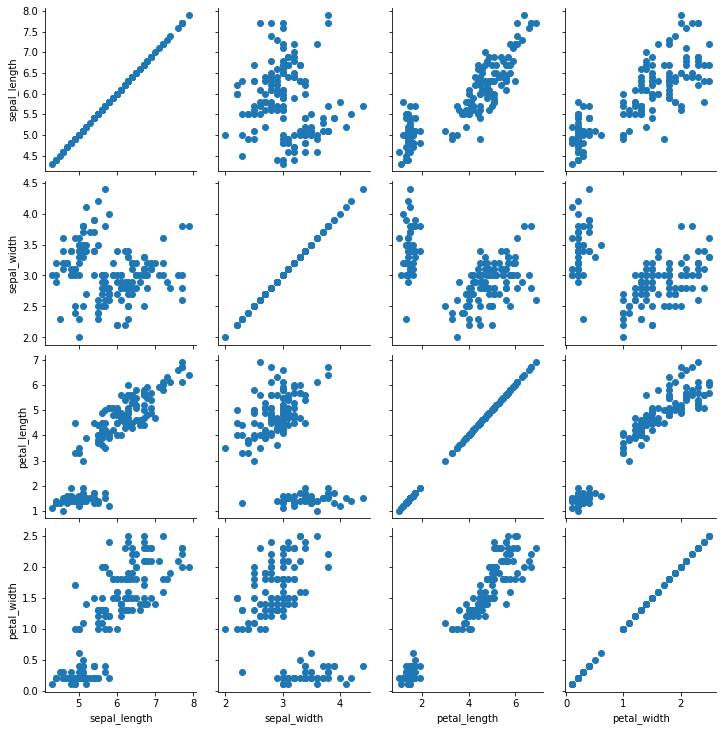

In [0]:
# Se mapea el tipo de gráfico que queremos en las figuras
g = sns.PairGrid(iris)
g.map(plt.scatter)

Podemos mediante la referencia a la cuadricula, establecer distintos tipos de diagrama para cada gráfica, por ejemplo en el siguiente caso se mapea una diagrama tipo **hist** para la diagonal principal, uno de tipo **scatter** para las gráficas inferiores a esta diagonal, y uno de tipo **kde** para las gráficas superiores:


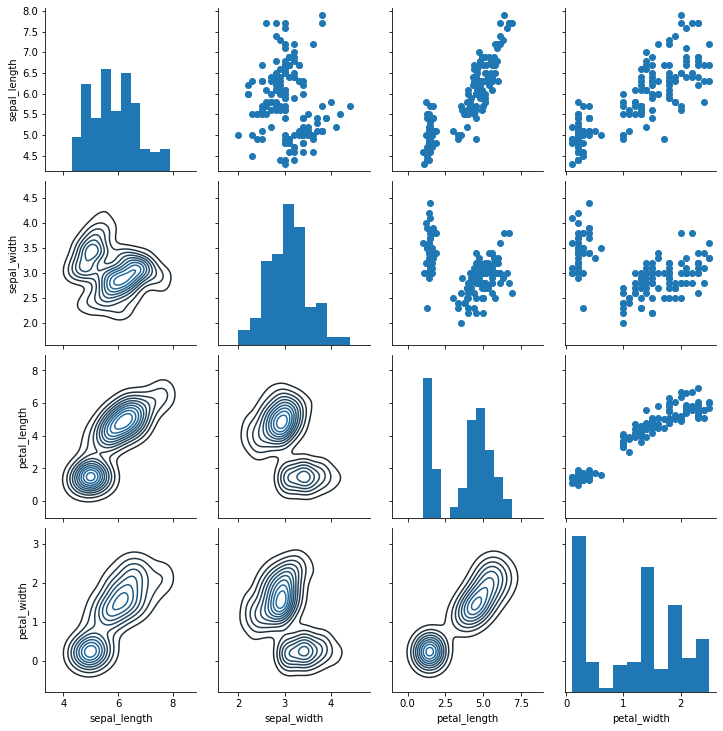

In [0]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

**PairGrid()** puede recibir otros parámetros adicionales que permiten personalizar las gráficas u obtener mas información, como ejemplo vemos en el siguiente código que podemos subclasificar los datos con el parámetro **hue** y también personalizar los marcadores para cada subclase con **hue_kws**, otras opciones permiten por ejemplo usar distintos tipos de colores para los diagramas

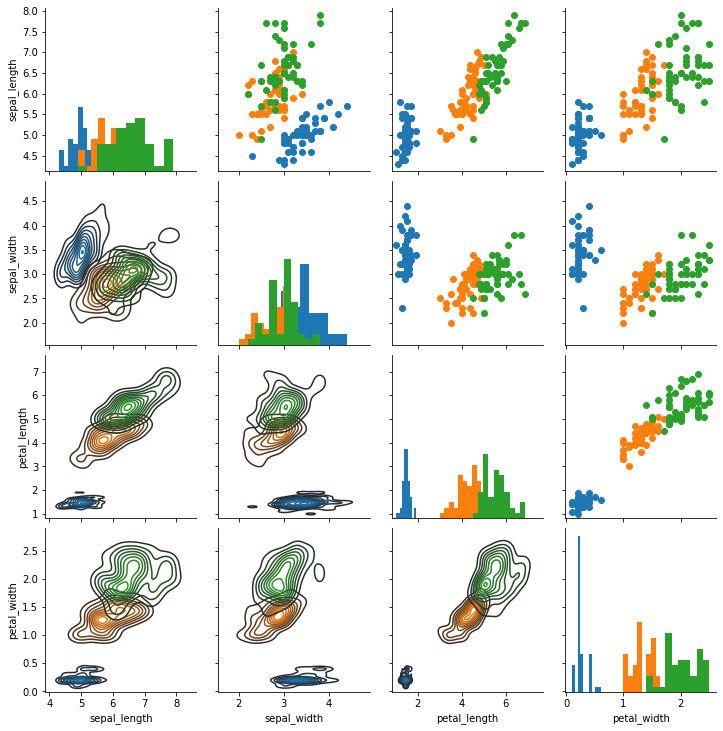

In [0]:
# se subclasifican los diagramas de acuerdo a la especie y se personalilzan los marcadores
g = sns.PairGrid(iris, hue='species')  # hue_kws={"marker": ["o", "s", "D"]}
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


## FacetGrid

FacetGrid permite generar gráficos con base en la agrupación de estos por una (o dos) característica en común, entendiendose característica como la información en una columna no cuantitativa, una vez definidas las agrupaciones se graficará el tipo de diagrama que se desea sobre la variable númerica que se quiera analizar,  el concepto se entiende mejor mediante el uso de los ejemplos siguientes

Usaremos el mismo datagrama **tips** usado hasta ahora:

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


El llamado a **FacetGrid()** se hace definiendo el datagrama a usar y el par de variables o columnas por los cuales se agruparan los datos, esto generará las gráficas en blanco sobre las cuales se diagramará, para el caso del siguiente ejemplo se realizarán las agrupaciones con base en las variables: **smoker** y **time**:

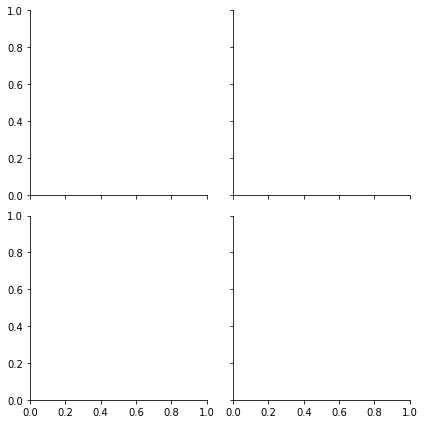

In [0]:
# Solo la cuadrícula
g = sns.FacetGrid(tips, col="time", row="smoker")

Ahora se mapea sobre las gráficas el estilo de diagrama para la variable cuantitativa a analizar, en el ejemplo se realiza un diagrama de tipo **hist** para la variable **total_bill**

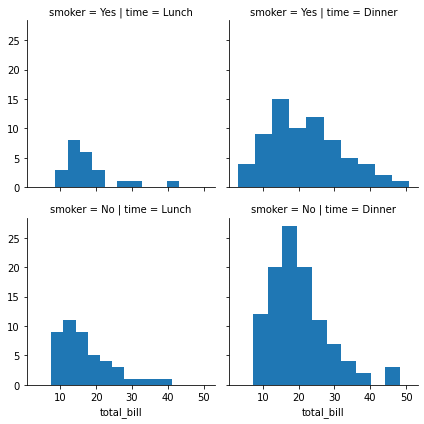

In [0]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

Como se ve en las gráficas las agrupaciones se han realizado para fumadores y no fumadores para cada tiempo respectivamente, podria haberse realizado la agrupación por una sola variable, por ejemplo **smoker** y tendriamos el siguiente resultado:

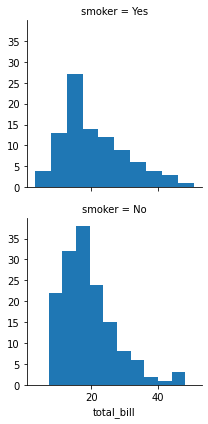

In [0]:
g = sns.FacetGrid(tips, row="smoker")
g = g.map(plt.hist, "total_bill")

Con **FacetGrid** es posible también definir una subclasificación con base en otra variable y mediante el parámetro **hue**, por ejemplo en el siguiente caso vemos el uso de **hue** con el valor **sex**, de esta manera en cada agrupación se hará una diferenciacion por sexo, también usamos el siguiente ejemplo para mostrar que estilos de diagramas del tipo **scatter** requieren de dos variables numéricas para la diagramación, en este caso se usan **total_bill** y **tip**, si se hace el llamado con solo una se generaría un error por deficiencia de argumentos, tambien se ilustra como agregar una leyenda al diagrama

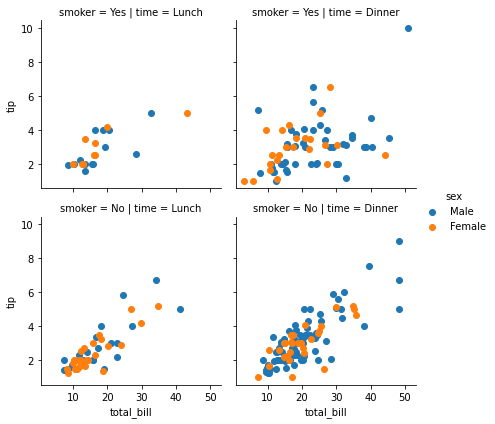

In [0]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid es la versión general de las cuadrículas de tipo **jointplot()** que se describió previamente.


Primero se hace el llamado a la función definiendo el datagrama a usar y el par de variables a representar en cada eje, con esto obtenemos una gráfica en blaco referenciada por la letra **g** que usaremos para definir el tipo y características del diagrama a elaborar

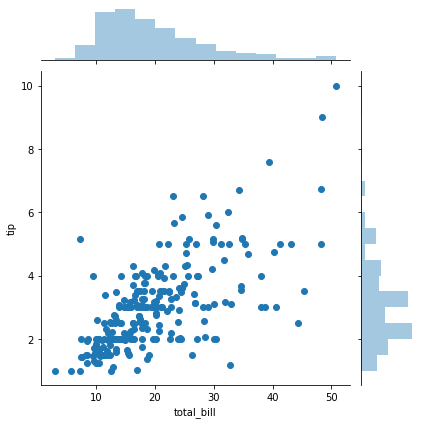

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips)

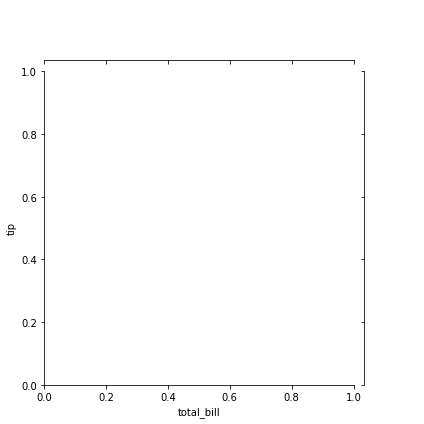

In [0]:
# Crea la cuadrícula
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

Usando **g** como referencia a la cuadricula, definimos el tipo de diagrama y obtenemos el siguiente resultado:

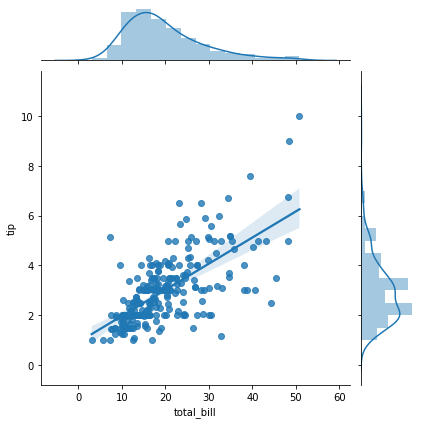

In [0]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)


# 6. Seaborn: Regresiones

Seaborn viene con funcionalidades para graficar regresiones. Veremos la función **lmplot()**.

Para los ejemplos usados se hace uso nuevamente del dataframe de propinas **tips**:

In [0]:
tips = sns.load_dataset('tips')

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()


**lmplot** permite visualizar modelos lineales, pero también permite dividir los gráficos en función de las características, así como también colorear el tono en función de las características.


Iniciamos con el diagrama de regresión lineal para las variables **total_bill** y **tips** del datagrama **tips**:

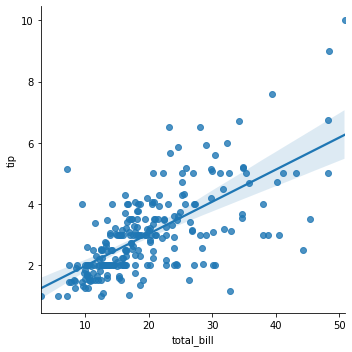

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips )            #,ci=None 

Es posible realizar la relación lineal para distintas categorias sobre un mismo diagrama, en el caso siguiente vemos como podemos obtener la linea de regresión lineal y las parejas de datos de manera independiente para los casos de hombres y mujeres, esto con la definición del parámetro **hue** con el valor **sex**:

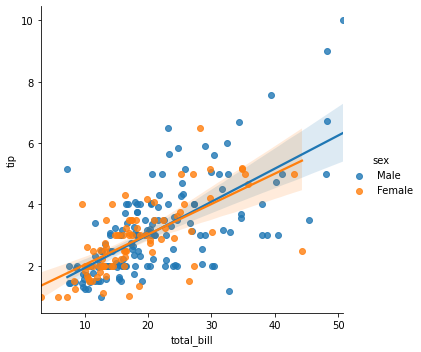

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

### Marcadores

Es posible igualmente personalizar la gráfica definiendo diferentes tipos de marcadores, de acuerdo a los soportados por matplotlib, y también hacer uso de una paleta de tonos diferente a la usada por defecto, para ello se deben definir los parámetros **palette** y **markers** como se ilustra en el ejemplo siguiente:

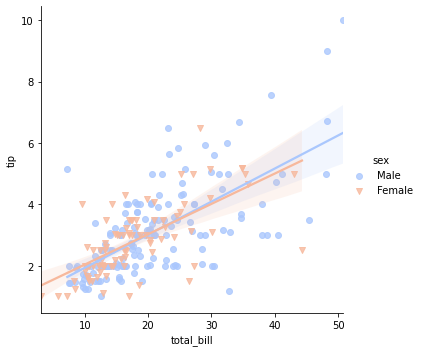

In [0]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'])

Si se quiere modificar otros parámetros de matplotlib más específicos como el tamaño del marcador, es necesario pasar esta información como un parámetro adicional que es un diccionario. Así:

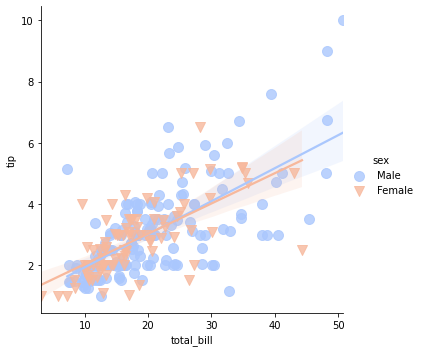

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

**Explicación:** Los argumentos kwargs de lmplot pasan a **regplot** que es una forma más general de lmplot(). regplot tiene un parámetro scatter_kws que se pasa a plt.scatter. Entonces si se quiere establecer el parámetro 's' en ese diccionario, que corresponde al tamaño del marcador, es necesario modificar este argumento en el diccionario. En otras palabras, terminas pasando un diccionario con los argumentos base de matplotlib, en este caso, 's' para el tamaño del marcador en un diagrama de dispersión. Si quiere conocer los detalles se recomienda revisar las documentación: http://matplotlib.org/api/markers_api.html


## Cuadrículas

Podemos separar aún más las representaciones de los modelos lineales añadiendo una cuadrícula para analizar variables específicas. Simplemente hay que indicar los argumentos **col** o **row**:

En el siguiente caso las gráficas para cada uno de los sexos se muestran en las columnas de la cuadricula:

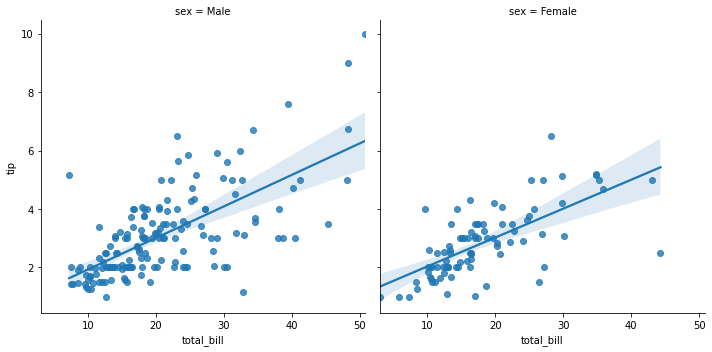

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

Adicionalmente también se pueden asignar las filas para clasificar por otra categoria, en el caso siguiente las columnas continuan siendo la clasificación por la variable **sexo** pero adicionalmente en las filas se hace la clasificación por la columna **time**:

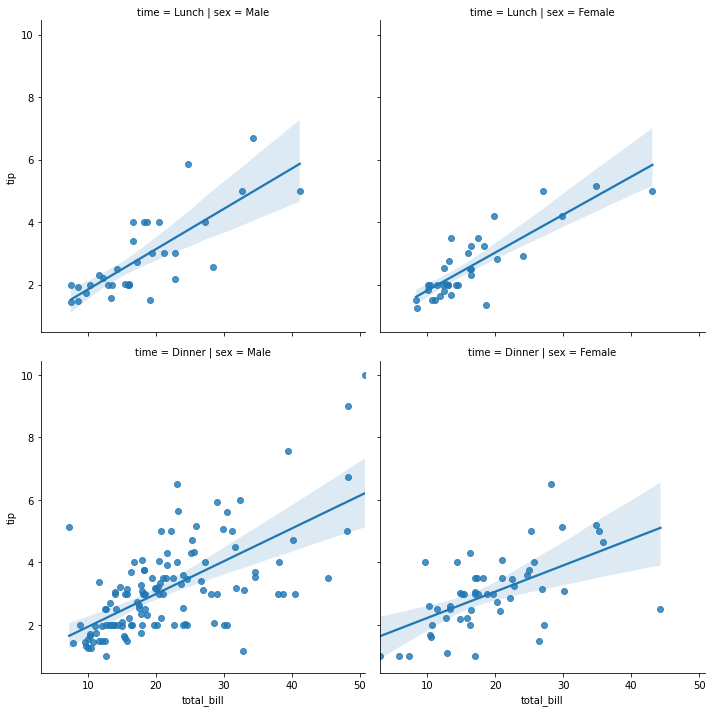

In [0]:
sns.lmplot(x="total_bill", y="tip", col="sex", row="time",data=tips)

Es posible también combinar el uso de **col**, y **row**  con el uso de **hue** para lograr así visuallizar una mayor cantidad de información:

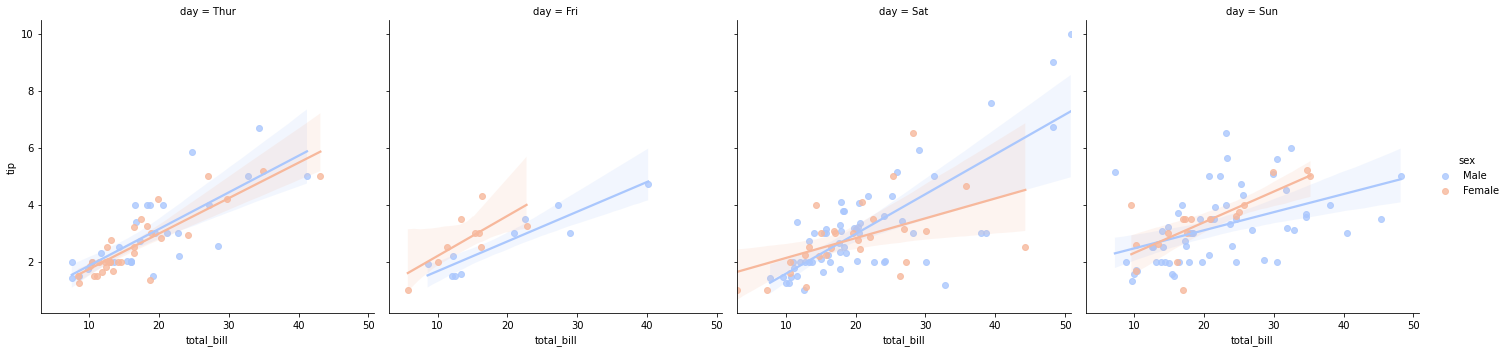

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

In [0]:
sns.lmplot?

## Aspecto y Tamaño

Las figuras de Seaborn pueden ajustarse en tamaño y relación de aspecto con los parámetros **size** y **aspect**:

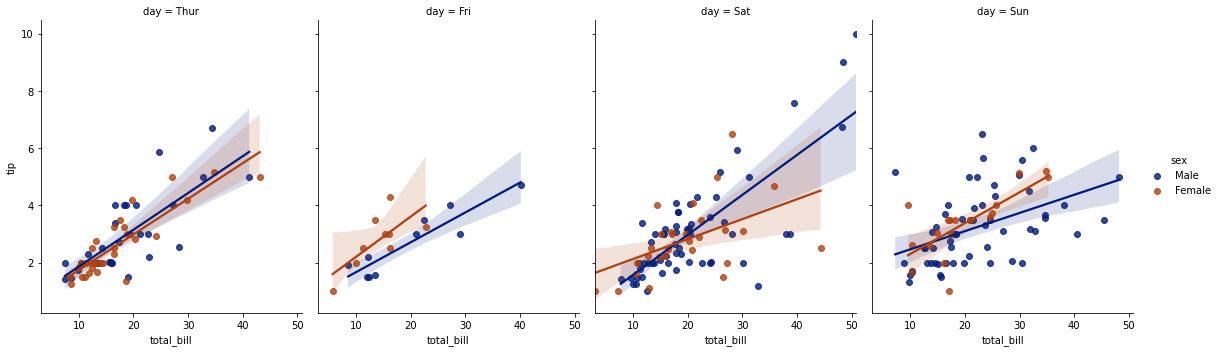

In [0]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='dark',aspect=0.8,height=5)

# 7. Seaborn: Estilo y color


Seaborn es bastante amplio en opciones para personalizar la visualización de las gráficas, veremos algunas de las principales haciendo uso del datagrama de propinas **tips**, la documentación oficial de seaborn detalla todas las opciones disponibles

## Estilos

Se puede usar estilos predefinidos mediante la función **set_style()**

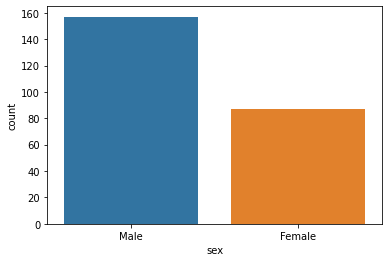

In [0]:
sns.countplot(x='sex',data=tips)

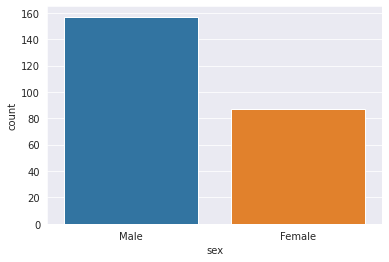

In [0]:
# Se puede escoger cualquiera de estos estilos: {darkgrid, whitegrid, dark, white, ticks}
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

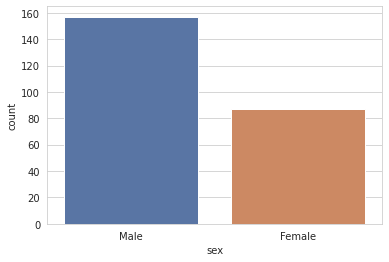

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips,palette='deep')

## Retirar los ejes innecesarios (despine)

Con la función **despine** es posible prescindir de los ejes que no se quieran visualizar

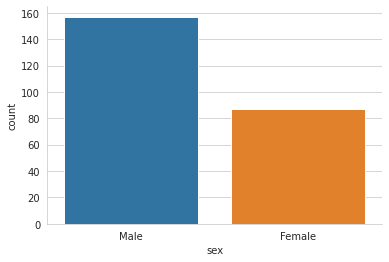

In [0]:
sns.countplot(x='sex',data=tips)
sns.despine()

Es posible definir explicitamente cuales ejes se desean visualizar y cuales no mediante la definición de los siguientes parámetros al invocar la función despine: 

top=True, right=True, left=False, bottom=False

los valores mostrados corresoinden a los valores por defecto.

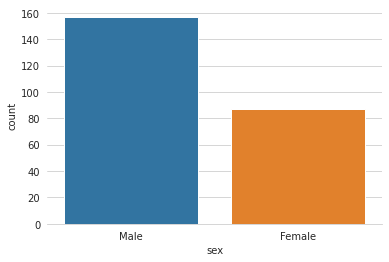

In [0]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Tamaño y relación de aspecto

Se puede usar el método de matplotlib **plt.figure(figsize=(width,height) ** para cambiar el tamaño de la mayoría de las figuras de Seaborn.

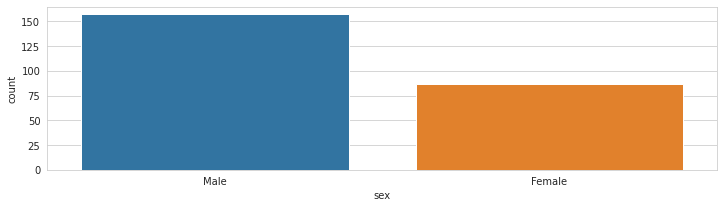

In [0]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

También se puede controlar el tamaño y la relación de aspecto de los gráficos de cuadrícula de Seaborn pasando los parámetros **size** y **aspect**. Por ejemplo:

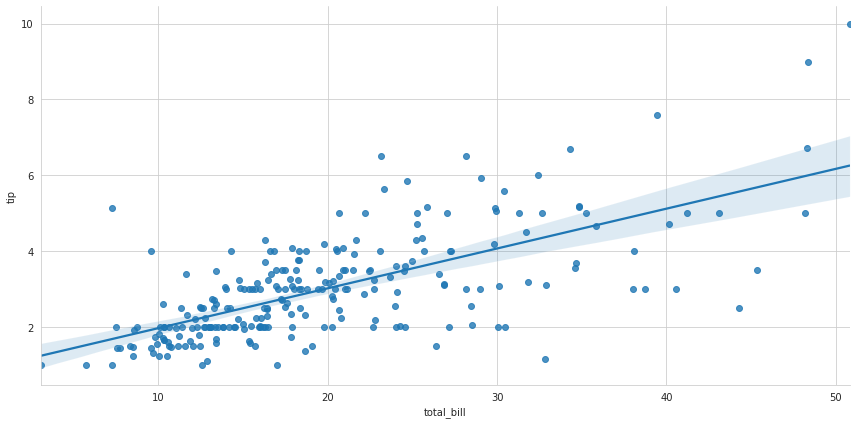

In [0]:
# Gráfico de tipo Grid
sns.lmplot(x='total_bill',y='tip',height=6,aspect=2,data=tips)

## Escalar gráficos de acuerdo al contexto

El método set_context() permite sobreescribir los parámetros por defecto. Los contextos posibles son:
* paper
* notebook (por defecto)
* talk
* poster

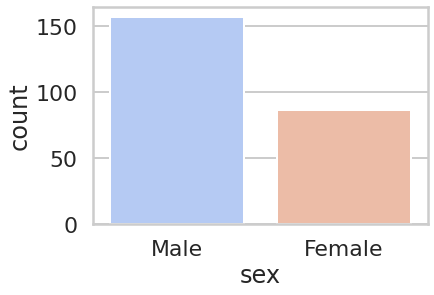

In [0]:
sns.set_context('poster')     #,font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')

In [0]:
sns.set_context('notebook')    

En los siguientes enlaces encontrará documentación detallada de las opciones disponibles para la personalización de la visualización de las gráficas:

**Ver:**
* http://seaborn.pydata.org/tutorial/aesthetics.html 
* Colormaps cuando se especifica una paleta de colores: https://matplotlib.org/examples/color/colormaps_reference.html


## Quiz

En el siguiente ejercicio debe leer los datos de iris en la siguiente URL:

https://drive.google.com/uc?export=download&id=1Jf9XUQPJbyE7FYOwV32PQMLdO2k5-DRB

Una vez leídos, haga una gráfica boxplot para la características del ancho del pétalo, diferenciando las especies con un color diferente cada una.

Su gráfica debe verse así (es posible que el estilo de la figura no sea exactamente igual):

![texto alternativo](https://drive.google.com/uc?export=download&id=1qSCa2oDnlCrGCn_Y5JehPx436HLKoIN8)

In [0]:
# Lectura de datos
url="https://drive.google.com/uc?export=download&id=1Jf9XUQPJbyE7FYOwV32PQMLdO2k5-DRB"
df_iris = pd.read_csv(url)
df_iris.head(3)


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


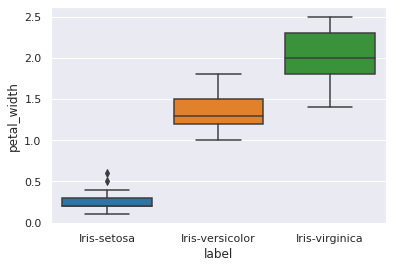

In [0]:
# ESCRIBA AQUI EL CÓDIGO PARA VISUALIZAR
sns.set_style('darkgrid')
sns.boxplot(x='label', y='petal_width', data=df_iris)